Загрузите данные о вероятности развития сердечного приступа. Описание датасета смотрите здесь: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/heart.csv')

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.dtypes 

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [ ]:
y = data["HeartDisease"]
x = data.drop(["HeartDisease",'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope'], axis=1)

In [ ]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2)

Постройте следующие модели классификации:

-случайное предсказание (подбрасывание кубика)

-логистическая регрессия (LogisticRegression);

-метод опорных векторов с линейным ядром (SVC(kernel='linear'));

-метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

-метод k ближайших соседей (KNeighborsClassifier с двумя классами).

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred1 = cls.predict(x_test)
y_pred1

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred1)) 
print(classification_report(y_test,y_pred1))

[[67 21]
 [20 76]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        88
           1       0.78      0.79      0.79        96

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score

In [ ]:
y_pred_train = cls.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.7561307901907357

In [ ]:
y_pred1 = cls.predict(x_test)
accuracy_score(y_test, y_pred1)

0.7771739130434783

In [ ]:
f1 = f1_score(y_test, y_pred1)
f1

0.7875647668393783

In [ ]:
y_pred1 = cls.predict(x_test)
y_pred_proba = cls.predict_proba(x_test)
y_pred_proba

array([[0.86464509, 0.13535491],
       [0.4045251 , 0.5954749 ],
       [0.19621683, 0.80378317],
       [0.79760712, 0.20239288],
       [0.14949443, 0.85050557],
       [0.8311227 , 0.1688773 ],
       [0.72132908, 0.27867092],
       [0.05059179, 0.94940821],
       [0.24637678, 0.75362322],
       [0.23338328, 0.76661672],
       [0.07325803, 0.92674197],
       [0.53877476, 0.46122524],
       [0.09435497, 0.90564503],
       [0.89449843, 0.10550157],
       [0.07147981, 0.92852019],
       [0.22929913, 0.77070087],
       [0.05956824, 0.94043176],
       [0.84173456, 0.15826544],
       [0.49843275, 0.50156725],
       [0.58793089, 0.41206911],
       [0.39279902, 0.60720098],
       [0.77089681, 0.22910319],
       [0.66390935, 0.33609065],
       [0.03879247, 0.96120753],
       [0.49791069, 0.50208931],
       [0.02074727, 0.97925273],
       [0.16314963, 0.83685037],
       [0.86459912, 0.13540088],
       [0.55995011, 0.44004989],
       [0.55124452, 0.44875548],
       [0.

In [ ]:
probs = y_pred_proba[:, 1]
fpr1, tpr1, treshold = roc_curve(y_test, probs)

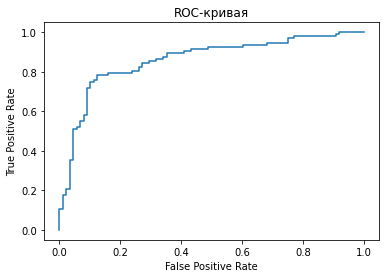

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:
roc_auc = auc(fpr1, tpr1)
roc_auc

0.859375

In [ ]:
from sklearn.svm import SVC
cll = SVC(kernel='linear', random_state=True,probability=True)
cll.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=True)

In [ ]:
y_pred2 = cll.predict(x_test)
y_pred2

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred2)) 
print(classification_report(y_test,y_pred2))

[[71 17]
 [20 76]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        88
           1       0.82      0.79      0.80        96

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



In [ ]:
y_pred_train = cll.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.7602179836512262

In [ ]:
y_pred = cll.predict(x_test)
accuracy_score(y_test, y_pred2)

0.7989130434782609

In [ ]:
f1 = f1_score(y_test, y_pred2)
f1

0.8042328042328043

In [ ]:
y_pred1 = cll.predict(x_test)
y_pred_proba = cll.predict_proba(x_test)
y_pred_proba

array([[0.84644479, 0.15355521],
       [0.40724302, 0.59275698],
       [0.1729635 , 0.8270365 ],
       [0.76976176, 0.23023824],
       [0.17353279, 0.82646721],
       [0.81338089, 0.18661911],
       [0.6796353 , 0.3203647 ],
       [0.05987446, 0.94012554],
       [0.27283213, 0.72716787],
       [0.24137463, 0.75862537],
       [0.09380589, 0.90619411],
       [0.53627253, 0.46372747],
       [0.10978137, 0.89021863],
       [0.86998426, 0.13001574],
       [0.09550254, 0.90449746],
       [0.24622293, 0.75377707],
       [0.07180319, 0.92819681],
       [0.82731306, 0.17268694],
       [0.52711204, 0.47288796],
       [0.56886622, 0.43113378],
       [0.39694799, 0.60305201],
       [0.74120831, 0.25879169],
       [0.66860359, 0.33139641],
       [0.04091975, 0.95908025],
       [0.51941689, 0.48058311],
       [0.02640314, 0.97359686],
       [0.17870115, 0.82129885],
       [0.84425308, 0.15574692],
       [0.57385868, 0.42614132],
       [0.56562833, 0.43437167],
       [0.

In [ ]:
probs = y_pred_proba[:, 1]
fpr2, tpr2, treshold = roc_curve(y_test, probs)

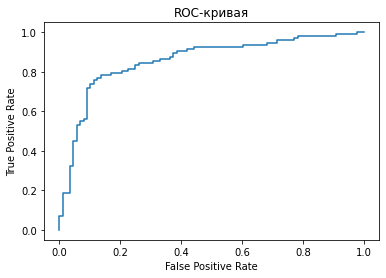

In [ ]:
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:
roc_auc = auc(fpr2, tpr2)
roc_auc

0.8479115479115479

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x_train, y_train)

In [ ]:
y_pred3 = lda.predict(x_test)
y_pred3

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred3)) 
print(classification_report(y_test,y_pred3))

[[58 16]
 [24 86]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        74
           1       0.84      0.78      0.81       110

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184



In [ ]:
y_pred_train = cll.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.771117166212534

In [ ]:
y_pred = cll.predict(x_test)
accuracy_score(y_test, y_pred3)

0.782608695652174

In [ ]:
f1 = f1_score(y_test, y_pred3)
f1

0.8113207547169811

In [ ]:
y_pred1 = lda.predict(x_test)
y_pred_proba = lda.predict_proba(x_test)
y_pred_proba

array([[0.90977585, 0.09022415],
       [0.41714851, 0.58285149],
       [0.25372729, 0.74627271],
       [0.85590037, 0.14409963],
       [0.15405555, 0.84594445],
       [0.86824303, 0.13175697],
       [0.72550773, 0.27449227],
       [0.07123264, 0.92876736],
       [0.20548577, 0.79451423],
       [0.18714866, 0.81285134],
       [0.07197849, 0.92802151],
       [0.48517714, 0.51482286],
       [0.08753275, 0.91246725],
       [0.91564193, 0.08435807],
       [0.05046008, 0.94953992],
       [0.16392662, 0.83607338],
       [0.08541871, 0.91458129],
       [0.87540001, 0.12459999],
       [0.5348087 , 0.4651913 ],
       [0.62214556, 0.37785444],
       [0.43349928, 0.56650072],
       [0.79530374, 0.20469626],
       [0.71856839, 0.28143161],
       [0.05764688, 0.94235312],
       [0.56918373, 0.43081627],
       [0.01712142, 0.98287858],
       [0.19972174, 0.80027826],
       [0.89802292, 0.10197708],
       [0.58093348, 0.41906652],
       [0.55905374, 0.44094626],
       [0.

In [ ]:
probs = y_pred_proba[:, 1]
fpr3, tpr3, treshold = roc_curve(y_test, probs)

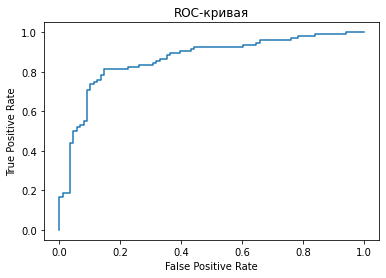

In [ ]:
plt.plot(fpr3, tpr3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:
roc_auc = auc(fpr3, tpr3)
roc_auc

0.8635179924242424

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 = KNeighborsClassifier()

In [ ]:
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred4 = model1.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred4)) 
print(classification_report(y_test,y_pred4))

[[63 25]
 [19 77]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        88
           1       0.75      0.80      0.78        96

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



In [ ]:
y_pred_train = cll.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.7602179836512262

In [ ]:
y_pred = cll.predict(x_test)
accuracy_score(y_test, y_pred4)

0.7608695652173914

In [ ]:
f1 = f1_score(y_test, y_pred4)
f1

0.7777777777777777

In [ ]:
y_pred1 = model2.predict(x_test)
y_pred_proba = model2.predict_proba(x_test)
y_pred_proba

array([[0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4,

In [ ]:
probs = y_pred_proba[:, 1]
fpr4, tpr4, treshold = roc_curve(y_test, probs)

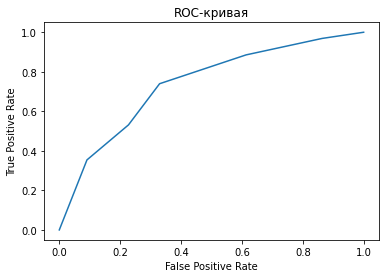

In [ ]:
plt.plot(fpr4, tpr4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:
roc_auc = auc(fpr4, tpr4)
roc_auc

0.73828125

#На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

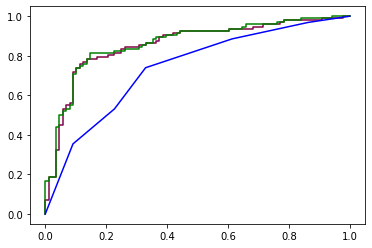

In [ ]:
fig , ax = plt.subplots()
ax.plot(fpr1, tpr1, c = 'yellow')
ax.plot(fpr2, tpr2, c ='purple')
ax.plot(fpr3, tpr3, c = 'green')
ax.plot(fpr4, tpr4, c = 'blue')


LinearDiscriminantAnalysis наиболее эффективна 




#Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.

In [ ]:
roc_auc_log_reg = auc(fpr1, tpr1)
roc_auc_svc = auc(fpr2, tpr2)
roc_auc_lda = auc(fpr3, tpr3)
roc_auc_kneb = auc(fpr4, tpr4)
roc_auc_lda, roc_auc_log_reg, roc_auc_svc,  roc_auc_kneb

(0.8635179924242424, 0.8578361742424242, 0.8578361742424242, 0.73828125)

#Изобразите precision-recall кривую.

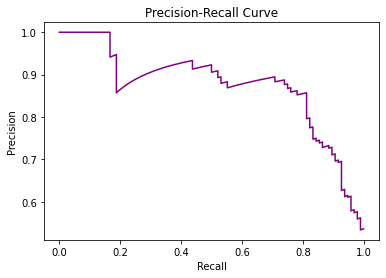

In [ ]:
from sklearn. metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show() 

#Оцените эффективность моделей при помощи показателя average precision.

In [ ]:
import sklearn
from sklearn. metrics import average_precision_score

print(sklearn.metrics. average_precision_score(y_test, y_pred1))
print(sklearn.metrics. average_precision_score(y_test, y_pred2))
print(sklearn.metrics. average_precision_score(y_test, y_pred3))
print(sklearn.metrics. average_precision_score(y_test, y_pred4))

0.7866847826086957
0.7556490571918343
0.5376527422563229
0.5035251382040938


#Постройте другую классификационную модель и сравните ее с описанными по следующим метрикам: accuracy, precision, recall, ROC-AUC, F1. Сделайте вывод о том, какая модель наиболее удачная для данной задачи.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time

model2 = MLPClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
y_pred

CPU times: user 245 ms, sys: 213 ms, total: 457 ms
Wall time: 239 ms


array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[61 27]
 [19 77]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73        88
           1       0.74      0.80      0.77        96

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184



In [ ]:
probs = y_pred_proba[:, 1]
fpr, tpr, treshold = roc_curve(y_test, probs)

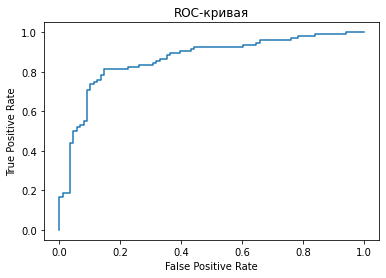

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:

roc_auc = auc(fpr, tpr) 
roc_auc

0.8635179924242424